In [1]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
image_path = 'COFFEE FLIGHT.png'
image_html = (f'<center><img src="{image_path}" width="1440" height="480">'
              '</center>')
display(HTML(image_html))

# <b>Coffee Flight
 <h4>Predicting the Country of Origin of Coffee Beans based on Taste Measurements, Processing Methods and Altitude Planted

### Problem Description:
Identifying the origins of coffee beans poses a significant challenge, especially for coffee enthusiasts seeking specific flavor profiles. This information is crucial for those who want to find coffee beans with similar taste characteristics. Moreover, it can greatly benefit coffee shop owners looking to diversify their offerings. In this context, the study aims to address the problem of identifying the geographical origins of coffee beans, providing valuable insights for both consumers and businesses in the coffee industry.

To achieve this, the study used a dataset available in [Kaggle](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi/data?select=merged_data_cleaned.csv). The dataset consists of 1339 rows and 44 columns. These attributes can be categorized into three main groups. The first group comprises attributes related to the taste profiles of the coffee beans. The second group includes 'metadata' about the beans, encompassing details such as color, variety, harvest year, and processing method. The final group pertains to the beans' origin, including specific information such as the country and region of production, as well as the altitude at which the beans were grown.

Notably, the dataset presents an imbalance challenge, which will be addressed through resampling. The study not only aims to construct predictive models but to evaluate and asses the impact of resampling in machine learning models.

### Highlights:
<ol>
    <li>
        Showcased extensive Exploratory Data Analysis and preprocessing to ensure quality analysis.
    <li>
        Introduced ImbLearn and ADASYN resampling techniques and how to include them in the pipeline.
    <li>
        Showed how ADASYN effectively highlights minority classes.
    <li>
        Demonstrated how resampling affects model metrics; accuracy is not always improved.
    <li>
        Recommendations on how to extend the study and what other use cases might benefit.
  </ol>  
    

### Methodology and Results
An extensive EDA and simultaneous preprocessing on interested features was done followed by the implementation of the different classifier machine learning models. Additionally, a new python library called 'imbalanced-learn' (imblearn) as well as one of the resampling techniques available within this package were introduced.

The 'imbalanced-learn' ([imblearn](https://imbalanced-learn.org/stable/)) Python package is a library specifically designed for dealing with imbalanced datasets in machine learning. Imbalanced datasets are those in which the distribution of classes is highly skewed, with one class significantly outnumbering the others. This can lead to biased models that perform poorly on minority class examples. Imbalanced-learn provides various techniques and tools to address this issue and improve the performance of machine learning models on imbalanced data.

ADASYN (Adaptive Synthetic Sampling) is an oversampling technique designed to balance the class distribution in an imbalanced dataset. ADASYN adapts the number of synthetic samples to generate for each minority class instance based on the number of majority class instances in its neighborhood. The more majority class neighbors a minority class sample has, the more synthetic samples ADASYN will generate for it. It generates more synthetic data for minority class samples that are harder to learn. Harder to learn samples are those who are usually misclassified and are usually found near decision boundaries.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To wrap contents of pandas dataframes
pd.set_option('display.max_colwidth', None)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#### Exploratory Data Analysis and Preprocessing

In [4]:
# Loading the DataSet
coffee_data = pd.read_csv('coffee_quality_merged_data_cleaned.csv')
print("Figure 1. First 5 entries of the dataset.\n")
coffee_data.head()

Figure 1. First 5 entries of the dataset.



,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [5]:
print("Figure 2. Summary information of the dataset\n")
coffee_data.info()

Figure 2. Summary information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country

Features that describe the coffee's quality, processing method and altitude where the  coffee beans have been produced are selected. Other features were not used anymore in this study.

In [6]:
coffee_measurements = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                       'Cupper.Points', 'Moisture', 'Processing.Method']
coffee_alts = ['unit_of_measurement', 'altitude_mean_meters']
target = ['Country.of.Origin']

print("Figure 3. First 5 entries of the features of interest\n")
coffee_data[coffee_measurements + coffee_alts + target].head()

Figure 3. First 5 entries of the features of interest



,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Processing.Method,unit_of_measurement,altitude_mean_meters,Country.of.Origin
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,Washed / Wet,m,2075.0,Ethiopia
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,Washed / Wet,m,2075.0,Ethiopia
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,NaN,m,1700.0,Guatemala
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,Natural / Dry,m,2000.0,Ethiopia
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,Washed / Wet,m,2075.0,Ethiopia


In [7]:
print("Figure 4. Summary information of the features of interest\n")
coffee_data[coffee_measurements + coffee_alts + target].info()

Figure 4. Summary information of the features of interest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aroma                 1339 non-null   float64
 1   Flavor                1339 non-null   float64
 2   Aftertaste            1339 non-null   float64
 3   Acidity               1339 non-null   float64
 4   Body                  1339 non-null   float64
 5   Balance               1339 non-null   float64
 6   Uniformity            1339 non-null   float64
 7   Clean.Cup             1339 non-null   float64
 8   Sweetness             1339 non-null   float64
 9   Cupper.Points         1339 non-null   float64
 10  Moisture              1339 non-null   float64
 11  Processing.Method     1169 non-null   object 
 12  unit_of_measurement   1339 non-null   object 
 13  altitude_mean_meters  1109 non-null   float64
 14  Country.of.Or

In [8]:
print("Figure 5. Summary statistics of the numerical features\n")
coffee_data[coffee_measurements + coffee_alts + target].describe().T

Figure 5. Summary statistics of the numerical features



,count,mean,std,min,25%,50%,75%,max
Aroma,1339.0,7.566706,0.377560,0.0,7.42,7.58,7.75,8.75
Flavor,1339.0,7.520426,0.398442,0.0,7.33,7.58,7.75,8.83
Aftertaste,1339.0,7.401083,0.404463,0.0,7.25,7.42,7.58,8.67
Acidity,1339.0,7.535706,0.379827,0.0,7.33,7.58,7.75,8.75
Body,1339.0,7.517498,0.370064,0.0,7.33,7.50,7.67,8.58
Balance,1339.0,7.518013,0.408943,0.0,7.33,7.50,7.75,8.75
Uniformity,1339.0,9.834877,0.554591,0.0,10.00,10.00,10.00,10.00
Clean.Cup,1339.0,9.835108,0.763946,0.0,10.00,10.00,10.00,10.00
Sweetness,1339.0,9.856692,0.616102,0.0,10.00,10.00,10.00,10.00
Cupper.Points,1339.0,7.503376,0.473464,0.0,7.25,7.50,7.75,10.00


In [9]:
print("Figure 6. Summary statistics of the categorical features\n")
(coffee_data[coffee_measurements + coffee_alts + target]
 .describe(include=['O']).T)

Figure 6. Summary statistics of the categorical features



,count,unique,top,freq
Processing.Method,1169,5,Washed / Wet,815
unit_of_measurement,1339,2,m,1157
Country.of.Origin,1338,36,Mexico,236


In [10]:
print("The different units of measurements found in"
      " 'unit_of_measurement' column\n")
coffee_data[coffee_alts]['unit_of_measurement'].unique()

The different units of measurements found in 'unit_of_measurement' column



array(['m', 'ft'], dtype=object)

Upon completing the initial Exploratory Data Analysis (EDA), several key observations were made:
<ul>
    <li>
        The dataset contained missing values in the 'Processing.Method' and 'altitude_mean_meters' columns.
    <li>
        The values of the 'altitude_mean_meters' column were inconsistent, with some values in 'feet' and others in 'meters' according to the 'unit_of_measurement' column.
    <li>
        There were outlier values for the 'altitude_mean_meters' column.
    <li>
        There was one row that did not have a value for 'Counntry.of.Origin'
    <li>
        The most used 'Processing.Method' was 'Washed / Wet'
</ul>        

The following were performed to handle the observations in the EDA

1. Converted all values of 'altitude_mean_meters' into meters to standardize the values in the column.
2. Filtered out the extremely high values. 
3. Imputed the empty values for the 'altitude_mean_meters' column with the country's mean value.
4. Imputed the empty values for the 'Processing.Method' column with the country's top used processing method.
5. Dropped the row that did not have a value for 'Country.of.Origin'
6. In addition, One Hot Encoding was implemented for the categorical columns to represent them numerically.

In [11]:
def feet_to_meters(unit, alt):
    """Convert feet measurements into meters"""
    if unit == 'm':
        return round(alt, 1)
    elif unit == 'ft':
        return round(alt*0.3048, 1)


coffee_data['altitude_mean_meters'] = coffee_data.apply(
    lambda x: feet_to_meters(x['unit_of_measurement'],
                             x['altitude_mean_meters']), axis=1)
coffee_data['unit_of_measurement'] = 'm'


pmethod_top = (coffee_data.groupby('Country.of.Origin')['Processing.Method']
               .describe())
# Impute the missing processing method
missing_pmethod = coffee_data[coffee_data['Processing.Method'].isna()].index
for i in missing_pmethod:
    country = coffee_data.loc[i, 'Country.of.Origin']
    if pd.notna(country) and country in pmethod_top.index:
        if pd.isna(pmethod_top.loc[country]['top']):
            coffee_data.loc[i, 'Processing.Method'] = 'Washed / Wet'
        else:
            coffee_data.loc[i, 'Processing.Method'] = (pmethod_top
                                                       .loc[country]['top'])
    else:
        # Handle the case where 'Country.of.Origin' is NaN or not in the index of pmethod_top
        coffee_data.loc[i, 'Processing.Method'] = 'Washed / Wet'

# Filter out the Extreme Values of 'altitude_mean_meters'
coffee_data = (coffee_data[~(coffee_data['altitude_mean_meters'] >= 11000)]
               .copy().dropna(subset='Country.of.Origin'))
alt_mean = (coffee_data.groupby('Country.of.Origin')['altitude_mean_meters']
            .describe())
missing_alts = coffee_data[coffee_data['altitude_mean_meters'].isna()].index

for i in missing_alts:
    country = coffee_data.loc[i,'Country.of.Origin']
    coffee_data.loc[i,'altitude_mean_meters'] = alt_mean.loc[country]['mean']

In [12]:
# Saving a new variable for the cleaned data
coffee_selected = coffee_data[coffee_measurements + 
                               coffee_alts + target].copy()

In [13]:
# One hot Encoding the Categorical Column 'Processing.Method'
coffee_preprocessed = pd.get_dummies(coffee_selected,
                                     prefix='Processing',
                                     columns=['Processing.Method'],
                                     dtype='int')
coffee_preprocessed.drop('unit_of_measurement', axis=1, inplace=True)

In [14]:
print("Figure  7. First 5 entries of the preprocessed dataset")
coffee_preprocessed.head()

Figure  7. First 5 entries of the preprocessed dataset


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,altitude_mean_meters,Country.of.Origin,Processing_Natural / Dry,Processing_Other,Processing_Pulped natural / honey,Processing_Semi-washed / Semi-pulped,Processing_Washed / Wet
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,2075.0,Ethiopia,0,0,0,0,1
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,2075.0,Ethiopia,0,0,0,0,1
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,1700.0,Guatemala,0,0,0,0,1
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,2000.0,Ethiopia,1,0,0,0,0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,2075.0,Ethiopia,0,0,0,0,1


In [15]:
print("Figure 8. Summary statistics of the preprocessed dataset")
coffee_preprocessed.describe().T

Figure 8. Summary statistics of the preprocessed dataset


,count,mean,std,min,25%,50%,75%,max
Aroma,1334.0,7.568081,0.377242,0.0,7.420000,7.58,7.7500,8.75
Flavor,1334.0,7.521372,0.398541,0.0,7.330000,7.58,7.7500,8.83
Aftertaste,1334.0,7.402271,0.404152,0.0,7.250000,7.42,7.6475,8.67
Acidity,1334.0,7.536222,0.379878,0.0,7.330000,7.58,7.7500,8.75
Body,1334.0,7.517631,0.370618,0.0,7.330000,7.50,7.6700,8.58
Balance,1334.0,7.518328,0.409581,0.0,7.330000,7.50,7.7500,8.75
Uniformity,1334.0,9.834760,0.555384,0.0,10.000000,10.00,10.0000,10.00
Clean.Cup,1334.0,9.834993,0.765199,0.0,10.000000,10.00,10.0000,10.00
Sweetness,1334.0,9.856657,0.617038,0.0,10.000000,10.00,10.0000,10.00
Cupper.Points,1334.0,7.503951,0.474189,0.0,7.250000,7.50,7.7500,10.00


After completing the data pre-processing and cleaning stages, a dataset with coherent and logically consistent values was achieved. Next, attention was focused on analyzing the target variable. 

In [16]:
country_count = coffee_preprocessed['Country.of.Origin'].nunique()
# print(f'There are {country_count} different countries in this dataset')

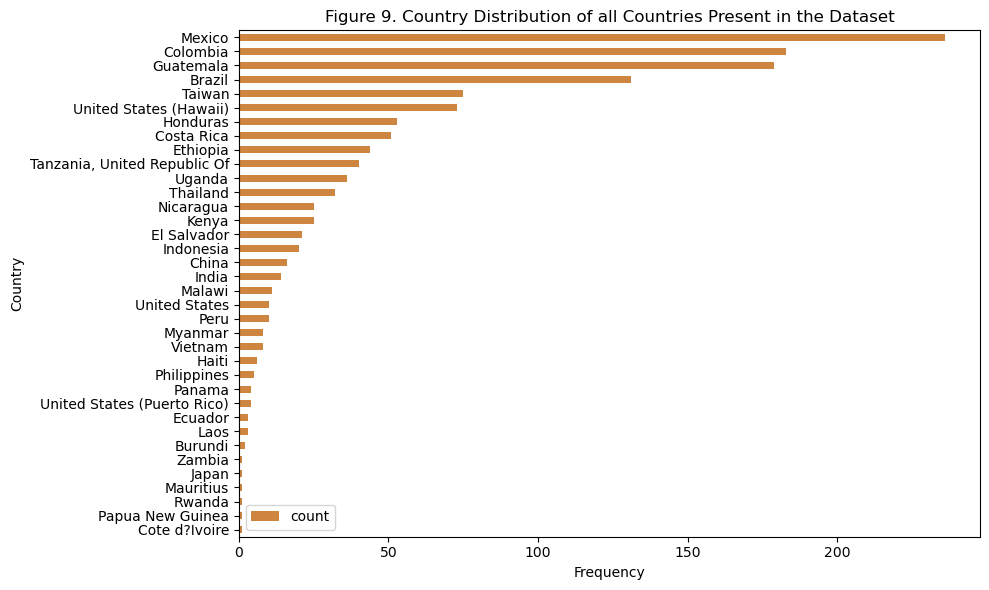

In [17]:
#Plotting
ax = (coffee_preprocessed['Country.of.Origin']
      .value_counts()
      .sort_values()
      .plot(kind='barh',
            figsize=(10, 6),
            color='peru'))
ax.set_ylabel('Country')
ax.set_xlabel('Frequency')
ax.set_title('Figure 9. Country Distribution of all Countries Present'
             ' in the Dataset')
ax.legend()
plt.tight_layout()  # Improved spacing between bars
plt.show();

The dataset consisted of 36 countries which were treated as the 36 classes of the classification problem. Examination of the bar graph revealed a significant class imbalance issue. To address this, ImbLearn's ADASYN technique was implemented to ensure adequate representation of minority classes, enhancing the machine learning models employed. In line with this, the dataset was filtered to retain only those countries with a value count of 30 or more. This decision aligned with ADASYN's default 'n_neighbors' parameter, which was set to 5. After analysis, it became evident that 30 was the minimum class value count required for ADASYN to function effectively in conjunction with the train_test split process. While it is possible to lower this threshold, doing so would introduce noise without offering any meaningful benefits.

Ultimately, these steps reduced the number of rows to 1133. Despite the reduction in size, these steps were crucial for enhancing the robustness and reliability of the resulting predictive model.


In [18]:
country_counts = coffee_preprocessed['Country.of.Origin'].value_counts()
countries_keep = country_counts[country_counts >= 30].index
filtered_coffee = (coffee_preprocessed[coffee_preprocessed['Country.of.Origin']
                                       .isin(countries_keep)])

In [19]:
print("Figure 10. List of countries having more than or equal to 30 samples")
country_counts[country_counts >= 30]

Figure 10. List of countries having more than or equal to 30 samples


Country.of.Origin
Mexico                          236
Colombia                        183
Guatemala                       179
Brazil                          131
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Name: count, dtype: int64

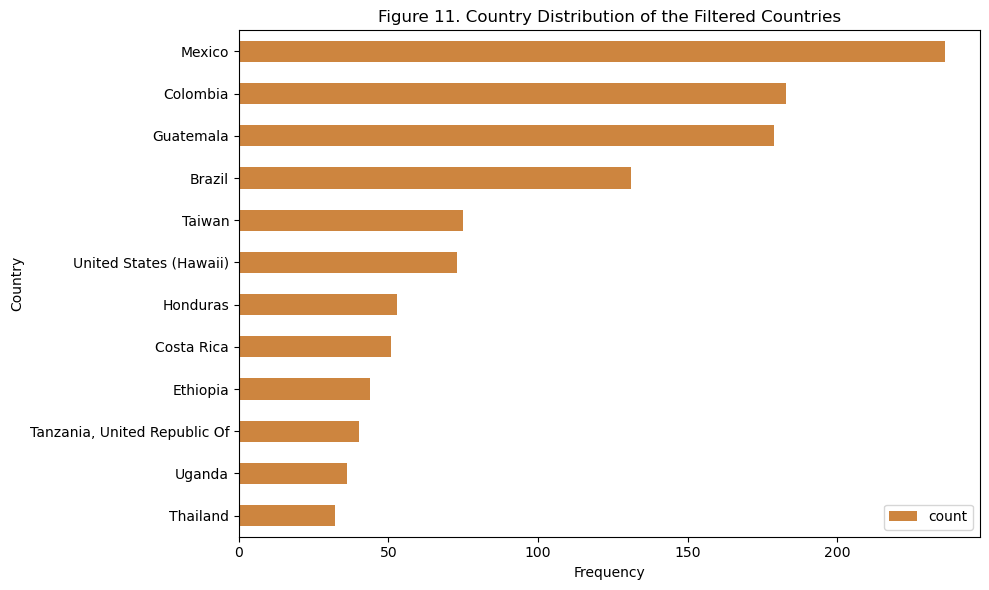

In [20]:
#Plotting
ax = (filtered_coffee['Country.of.Origin']
      .value_counts()
      .sort_values()
      .plot(kind='barh',
            figsize=(10, 6),
            color='peru'))
ax.set_ylabel('Country')
ax.set_xlabel('Frequency')
ax.set_title('Figure 11. Country Distribution of the Filtered Countries')
ax.legend()
plt.tight_layout()  # Improved spacing between bars
plt.show();

The Proportional Chance Criterion (PCC) was computed to establish the minimum accuracy threshold that the model must exceed, ensuring its effectiveness surpasses that of random chance. This step was crucial for setting a realistic performance benchmark, especially in the context of class imbalances. For this study, PCC to beat was about 15.64%

In [21]:
length = country_counts[country_counts >= 30].sum()
pcc = ((country_counts[country_counts >= 30].values / length)**2).sum()
# print(f"PCC to beat -- {pcc*100*1.25:.2f}%")

Figure 12. Pair Plot of the Numerical Columns


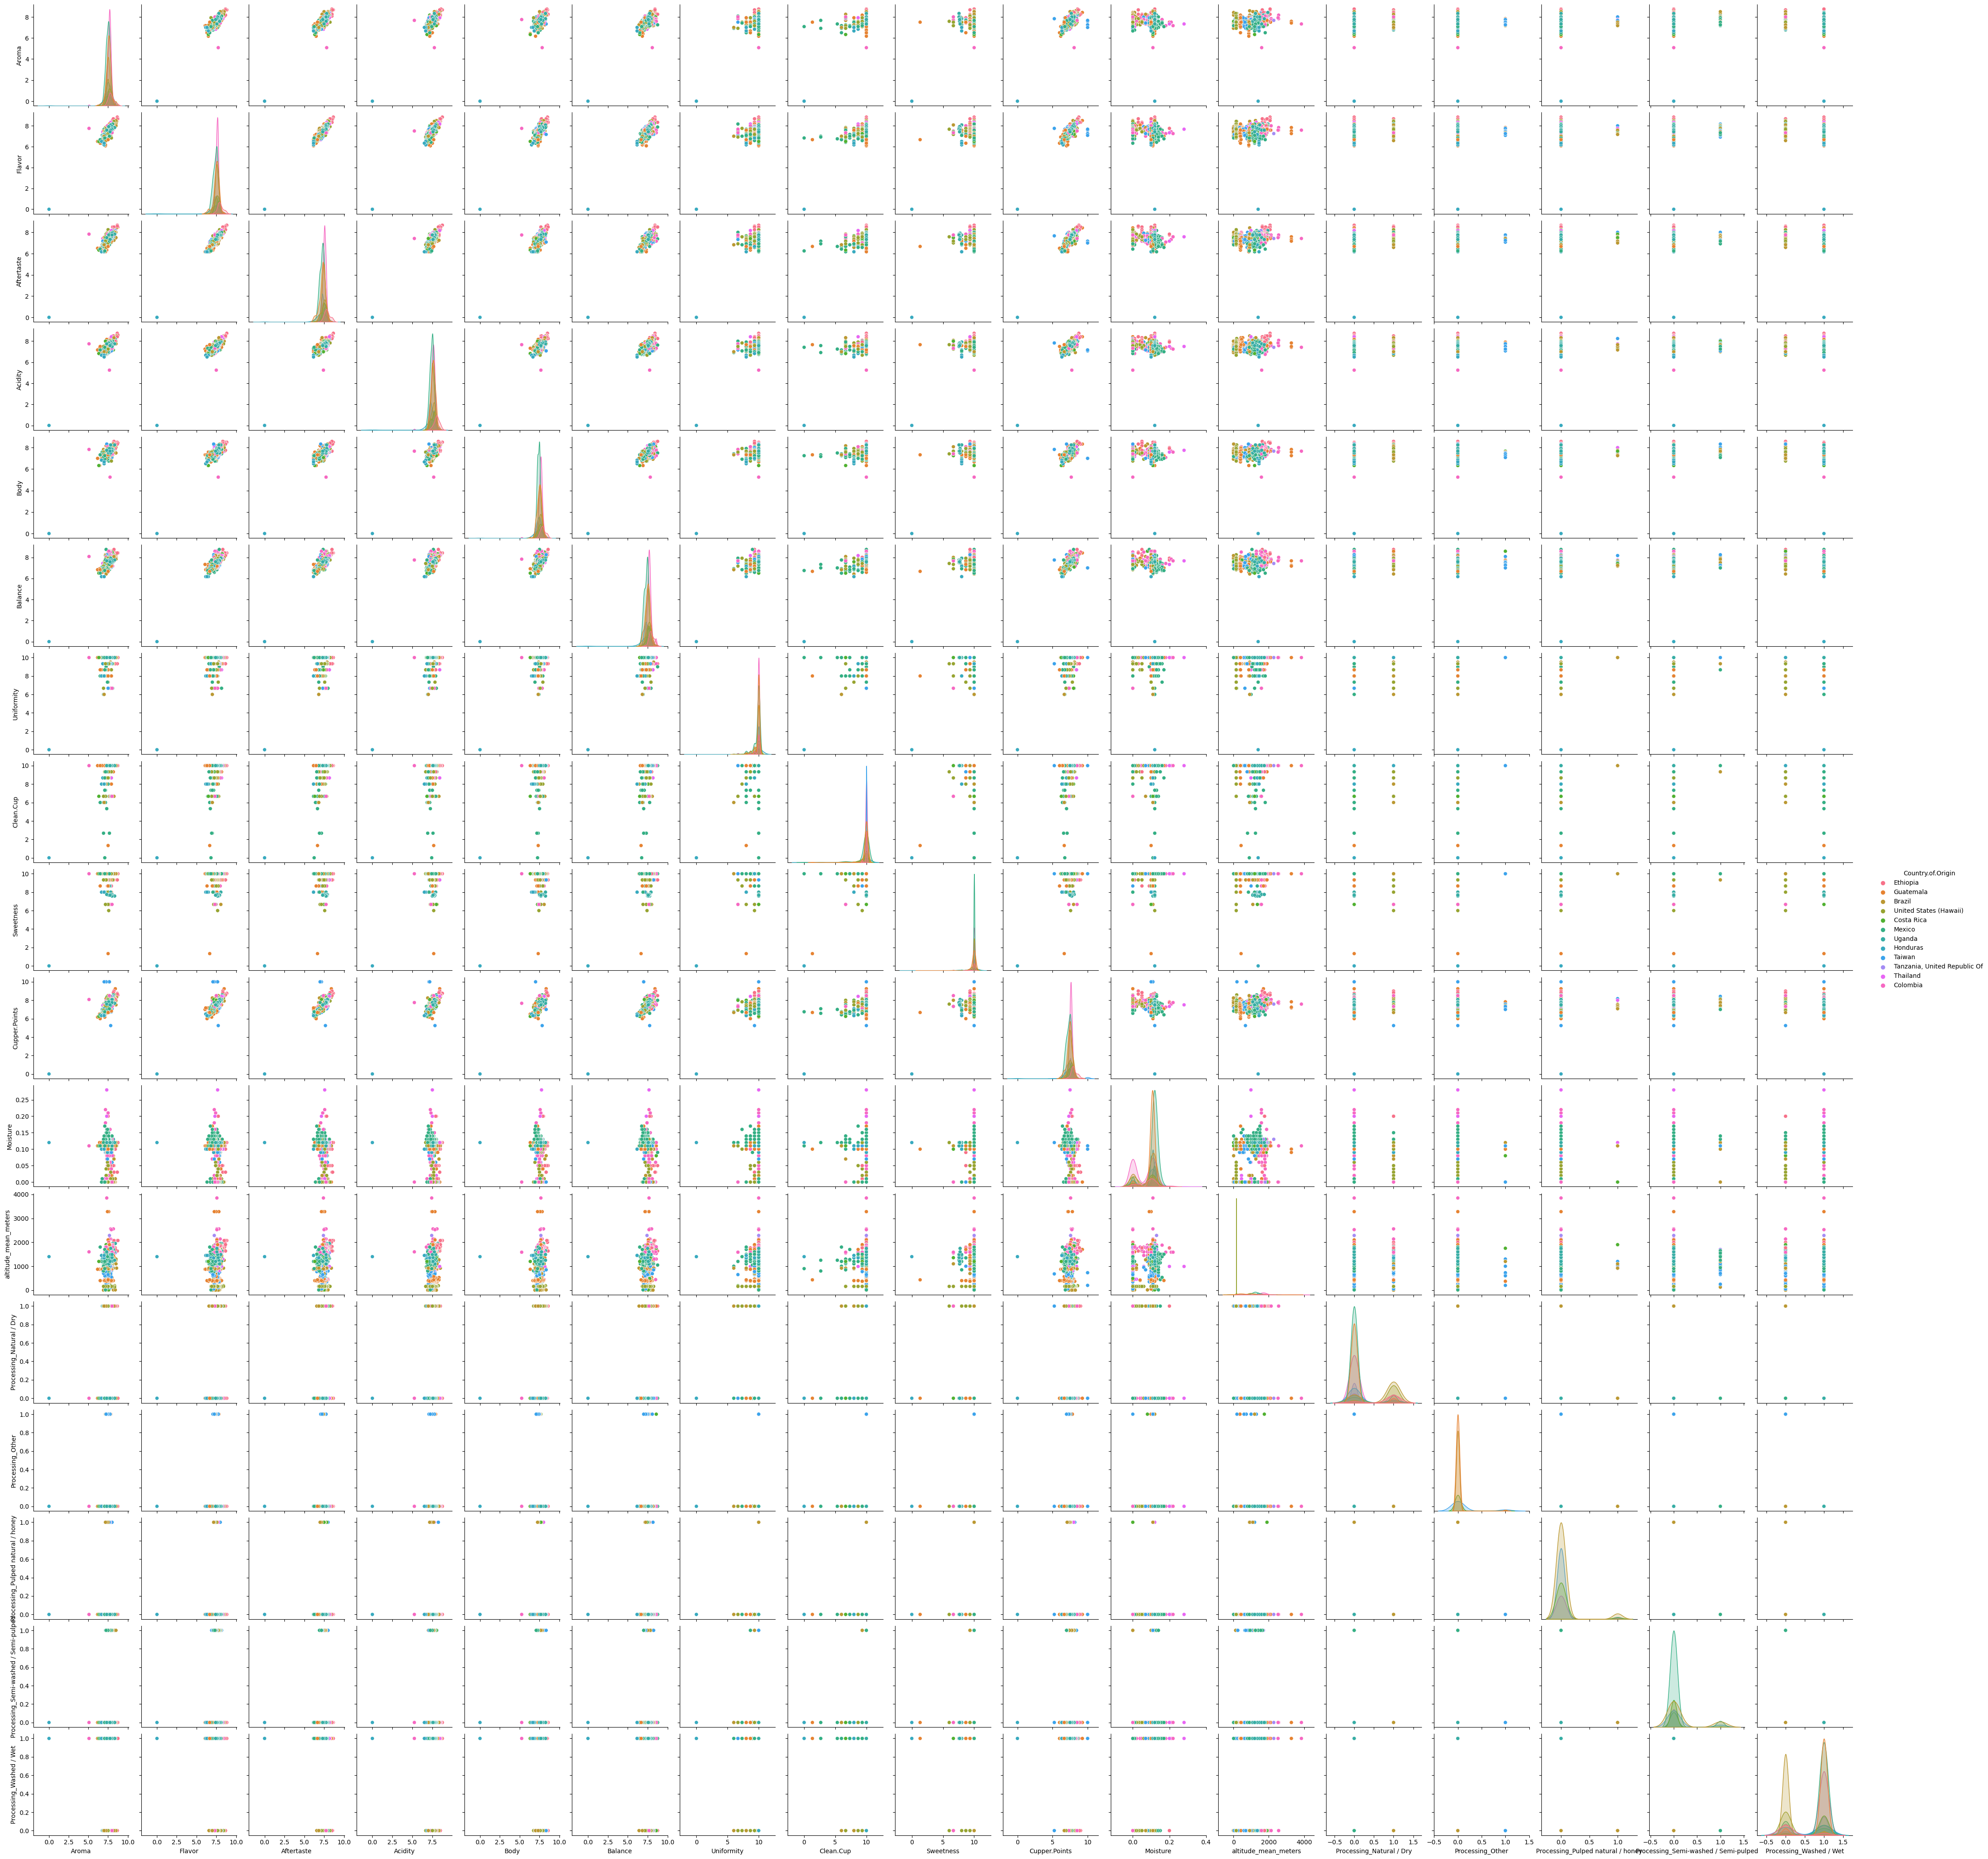

In [22]:
print("Figure 12. Pair Plot of the Numerical Columns")
sns.pairplot(filtered_coffee, hue='Country.of.Origin');

The pairplot of the preprocessed dataset was made in order to see if there were visible trends that can help in identfying top predictors. Unfortunately no insight of use to this study was obtained.

The following step divided the data in preparation for the training_validation and test split.
Variable 'X' was set to be the predictor variables and variable 'y' was set to be the target variable.
This is a vital step in any machine learning pipeline as this will test the robustness of the models.
The target variable country has been label encoded to transform it into categorical data.

In [47]:
X = filtered_coffee.drop('Country.of.Origin', axis=1)
y = filtered_coffee['Country.of.Origin']

print(f'Columns of Variable X:\n {list(X.columns)}')
print(f'\nTarget Variable: {y.name}')

Columns of Variable X:
 ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'altitude_mean_meters', 'Processing_Natural / Dry', 'Processing_Other', 'Processing_Pulped natural / honey', 'Processing_Semi-washed / Semi-pulped', 'Processing_Washed / Wet']

Target Variable: Country.of.Origin


In [24]:
# For Label Encoding Target Var
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
y_labeled = le.transform(y)
print('Figure 13. Country Name - Label Encoding Mapping:')
le_name_mapping

Figure 13. Country Name - Label Encoding Mapping:


{'Brazil': 0,
 'Colombia': 1,
 'Costa Rica': 2,
 'Ethiopia': 3,
 'Guatemala': 4,
 'Honduras': 5,
 'Mexico': 6,
 'Taiwan': 7,
 'Tanzania, United Republic Of': 8,
 'Thailand': 9,
 'Uganda': 10,
 'United States (Hawaii)': 11}

#### Model Implementation
The standard pipeline was followed, including the trainval-holdout split, data standardization/normalization, and model fitting and scoring.

The study explored three scenarios to assess the impact of integrating ADASYN into the pipeline:
1. Running machine learning models without parameter hyper-tuning and without ADASYN resampling in the pipeline.
2. Running machine learning models without parameter hyper-tuning but with the inclusion of ADASYN resampling in the pipeline.
3. Running machine learning models with ADASYN in the pipeline and parameter hyper-tuning.

It is essential to emphasize that when applying resampling techniques, such as ADASYN, resampling should only be applied on the train-validation (trainval) set and not the holdout set. Resampling the holdout set is not beneficial and can potentially harm the model's evaluation since it introduces synthetic data into the test phase, which does not reflect real-world scenarios.

In [25]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# For Generation of Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# For Normalizing/Scaling of Dataset
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

import time

In [26]:
# Function to get the top feature for linear models
def get_top_feature_linear(model, feature_names):
    """Get the top predictors for linear models"""
    coefficients = np.abs(model.coef_)
    
    # Check for multi-class scenario
    if len(coefficients.shape) > 1:  # Multi-class case
        max_indices = np.argmax(coefficients, axis=1)
        top_features = [feature_names[idx] for idx in max_indices]
        return top_features
    else:  # Binary classification case
        if coefficients.shape[-1] != len(feature_names):
            raise ValueError("Mismatch in number of coefficients and features")
        max_index = np.argmax(coefficients)
        return feature_names[max_index]


# Function to get the top feature for tree-based models
def get_top_feature_tree(model, feature_names):
    """Return the feature name of the higest feature_importance"""
    importances = model.feature_importances_
    max_index = np.argmax(importances)
    return feature_names[max_index]



In [27]:
# TrainVal - Hold out Split
X_trainval, X_holdout, y_trainval, y_holdout = (
    train_test_split(X, y_labeled,
                     test_size=0.2,
                     random_state=143)
)

#### Without ADASYN

In [28]:
steps_base = [
    ('scaler', StandardScaler()),
    (('clf', None))
]

pipe = Pipeline(steps_base)

param_grid_base = [
    {'clf': [KNeighborsClassifier()]},
    {'clf': [LogisticRegression(solver='saga', penalty='l1', max_iter=10000)]},
    {'clf': [LogisticRegression(solver='saga', penalty='l2', max_iter=10000)]},
    {'clf': [LinearSVC(penalty='l1', dual=False, max_iter=10000)]},
    {'clf': [LinearSVC(penalty='l2', dual=False)]},
    {'clf': [RandomForestClassifier()]},
    {'clf': [GradientBoostingClassifier()]},

]

results = {}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for params in param_grid_base:
    start_time = time.time()
    grid_search = GridSearchCV(pipe, params, cv=stratified_kfold,
                               scoring='accuracy',
                               return_train_score=True, n_jobs=-1)
    grid_search.fit(X_trainval, y_trainval)
    end_time = time.time()
    
    best_model = grid_search.best_estimator_
    best_model_name = best_model.named_steps['clf'].__class__.__name__
    hyperparams = (', '.join([f"{k.split('__')[1]}: {v}"
                              for k, v in best_model.get_params().items()
                              if 'clf__' in k]))

    if best_model_name in ['LogisticRegression', 'LinearSVC']:
        top_feature = get_top_feature_linear(best_model.named_steps['clf'],
                                             X_trainval.columns)
    elif best_model_name in ['RandomForestClassifier',
                             'GradientBoostingClassifier']:
        top_feature = get_top_feature_tree(best_model.named_steps['clf'],
                                           X_trainval.columns)
    else:
        top_feature = 'N/A'
    

    mean_train_score = (grid_search.cv_results_['mean_train_score']
                        [grid_search.best_index_])
    results[best_model_name] = {
        'Best Parameters': '--',
        'TrainVal train_score': mean_train_score,
        'TrainVal test_score': grid_search.best_score_,
        'Holdout score': accuracy_score(y_holdout,
                                        best_model.predict(X_holdout)),
        'runtime': end_time - start_time,
        'top_feature': top_feature
    }

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

print("Figure 14. Result of the First Scenario")
display(results_df)

Figure 14. Result of the First Scenario


,Model,Best Parameters,TrainVal train_score,TrainVal test_score,Holdout score,runtime,top_feature
0,KNeighborsClassifier,--,0.679087,0.541959,0.480176,1.756523,N/A
1,LogisticRegression,--,0.607888,0.558479,0.511013,1.534042,"[Processing_Washed / Wet, altitude_mean_meters, Flavor, altitude_mean_meters, Aftertaste, altitude_mean_meters, Sweetness, altitude_mean_meters, Flavor, altitude_mean_meters, altitude_mean_meters, altitude_mean_meters]"
2,LinearSVC,--,0.572020,0.543021,0.506608,0.127344,"[Processing_Washed / Wet, altitude_mean_meters, Flavor, Acidity, Aftertaste, altitude_mean_meters, Sweetness, Clean.Cup, Flavor, Aftertaste, Uniformity, altitude_mean_meters]"
3,RandomForestClassifier,--,1.000000,0.673280,0.621145,1.026771,altitude_mean_meters
4,GradientBoostingClassifier,--,0.997792,0.734005,0.696035,9.165431,altitude_mean_meters


A few things noted for the first scenario: 
1. KNN, Logistic Regression and LinearSVC have similar performance scores.
2. The tree based models, Random Forest and Gradient Boosting Methods, had the highest test scores but showed overfitting as seen with the significant difference between train and test scores.

#### With ADASYN

In [29]:
steps_adasyn = [
    ('scaler', StandardScaler()),
    ('resampler', ADASYN(random_state=42)),
    (('clf', None))]
pipe_adasyn = ImbPipeline(steps_adasyn)
param_grid_adasyn = [
    {'clf': [KNeighborsClassifier()]},
    {'clf': [LogisticRegression(solver='saga', penalty='l1', max_iter=20000)]},
    {'clf': [LogisticRegression(solver='saga', penalty='l2', max_iter=20000)]},
    {'clf': [LinearSVC(penalty='l1', dual=False, max_iter=20000)]},
    {'clf': [LinearSVC(penalty='l2', dual=False)]},
    {'clf': [RandomForestClassifier()]},
    {'clf': [GradientBoostingClassifier()]},

]

results = {}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for params in param_grid_adasyn:
    start_time = time.time()
    grid_search = GridSearchCV(pipe_adasyn, params, cv=stratified_kfold,
                               scoring='accuracy',
                               return_train_score=True, n_jobs=-1)
    grid_search.fit(X_trainval, y_trainval)
    end_time = time.time()
    
    best_model = grid_search.best_estimator_
    best_model_name = best_model.named_steps['clf'].__class__.__name__
    hyperparams = ', '.join([f"{k.split('__')[1]}: {v}"
                             for k, v in best_model.get_params().items()
                             if 'clf__' in k])

    if best_model_name in ['LogisticRegression', 'LinearSVC']:
        top_feature = get_top_feature_linear(best_model.named_steps['clf'],
                                             X_trainval.columns)
    elif best_model_name in ['RandomForestClassifier',
                             'GradientBoostingClassifier']:
        top_feature = get_top_feature_tree(best_model.named_steps['clf'],
                                           X_trainval.columns)
    else:
        top_feature = 'N/A'
        
    
    mean_train_score = (grid_search.cv_results_['mean_train_score']
                        [grid_search.best_index_])
    results[best_model_name] = {
        'Best Parameters': '--',
        'TrainVal train_score': mean_train_score,
        'TrainVal test_score': grid_search.best_score_,
        'Holdout score': accuracy_score(y_holdout,
                                        best_model.predict(X_holdout)),
        'runtime': end_time - start_time,
        'top_feature': top_feature
    }

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

print("Figure 15. Result of the Second Scenario")
display(results_df)

Figure 15. Result of the Second Scenario


,Model,Best Parameters,TrainVal train_score,TrainVal test_score,Holdout score,runtime,top_feature
0,KNeighborsClassifier,--,0.749450,0.486795,0.440529,0.342309,N/A
1,LogisticRegression,--,0.522627,0.470233,0.440529,3.120768,"[Flavor, altitude_mean_meters, Flavor, altitude_mean_meters, Aftertaste, Aftertaste, Aftertaste, altitude_mean_meters, Flavor, Uniformity, altitude_mean_meters, altitude_mean_meters]"
2,LinearSVC,--,0.482889,0.445947,0.387665,0.374257,"[Flavor, Processing_Pulped natural / honey, Processing_Natural / Dry, altitude_mean_meters, Aftertaste, Flavor, Sweetness, Clean.Cup, Flavor, Uniformity, Uniformity, altitude_mean_meters]"
3,RandomForestClassifier,--,1.000000,0.666681,0.678414,1.987383,altitude_mean_meters
4,GradientBoostingClassifier,--,0.990617,0.699788,0.674009,30.418558,altitude_mean_meters


Notes after the running the second scenario:
1. KNN was the only model that showed improvement with the train score.This can be attributed to resampling. Since the number of samples have increased the chances of having better predictions based from nearest-neighbors would be higher.
2. KNN, Logistic Regression and Linear SVC's performance on the test and holdout set declined.
3. Random Forest and Gradient Boosting Method still yielded the highest scores but were overfitting.

#### With ADASYN and hyperparameter tuning

In [30]:
# Hyperparameter Search Space
n_neighbor_range = range(3, 10)
C_range = np.logspace(-3, 3, 4)
penalty_vals = ['l1', 'l2']
max_depth_range_rf = [3, 4, 5, 6]
max_features_range_rf = [0.1, 'sqrt', 0.4, 0.6]
lr_range = [0.01, 0.03, 0.1]
max_depth_range_gbm = [1, 2, 3]
max_features_range_gbm = [0.1, 0.2, 'sqrt', 0.4]

steps_adasyn_hyp = [
    ('scaler', StandardScaler()),
    ('resampler', ADASYN(random_state=42)),
    (('clf', None))]
pipe_adasyn_hyp = ImbPipeline(steps_adasyn_hyp)

param_grid_adasyn_hyp = [
    {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': n_neighbor_range
    },
    {
        'clf': [LogisticRegression(solver='saga', max_iter=30000,
                                   random_state=42)],
        'clf__C': C_range,
        'clf__penalty': penalty_vals
    },
    {
        'clf': [LinearSVC(dual=False, max_iter=200000, random_state=42)],
        'clf__C': C_range,
        'clf__penalty': penalty_vals
    },
    {
        'clf': [RandomForestClassifier(n_estimators=300, random_state=42)],
        'clf__max_depth': max_depth_range_rf,
        'clf__max_features': max_features_range_rf
    },
    {
        'clf': [GradientBoostingClassifier(n_estimators=50, random_state=42)],
        'clf__learning_rate': lr_range,
        'clf__max_depth': max_depth_range_gbm,
        'clf__max_features': max_features_range_gbm
    }
]


results_with_scaling_and_tuning = {}


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for params in param_grid_adasyn_hyp:
    start_time = time.time()
    grid_search = GridSearchCV(pipe_adasyn_hyp, params, cv=stratified_kfold,
                               scoring='accuracy',
                               return_train_score=True, n_jobs=-1)
    grid_search.fit(X_trainval, y_trainval)
    end_time = time.time()
    
    best_model = grid_search.best_estimator_
    best_model_name = best_model.named_steps['clf'].__class__.__name__
    hyperparams = ', '.join([f"{k.split('__')[1]}: {v}"
                             for k, v in best_model.get_params().items()
                             if 'clf__' in k])

    if best_model_name in ['LogisticRegression', 'LinearSVC']:
        top_feature = get_top_feature_linear(best_model.named_steps['clf'],
                                             X_trainval.columns)
    elif best_model_name in ['RandomForestClassifier',
                             'GradientBoostingClassifier']:
        top_feature = get_top_feature_tree(best_model.named_steps['clf'],
                                           X_trainval.columns)
    else:
        top_feature = 'N/A'
    

    mean_train_score = (grid_search.cv_results_['mean_train_score']
                        [grid_search.best_index_])
    results_with_scaling_and_tuning[best_model_name] = {
        'Best Parameters': ', '.join([f"{k.split('__')[1]}: {v}"
                                      for k, v in (grid_search.best_params_
                                                   .items())
                                      if k != 'clf']),
        'TrainVal train_score': mean_train_score,
        'TrainVal test_score': grid_search.best_score_,
        'Holdout score': accuracy_score(y_holdout,
                                        best_model.predict(X_holdout)),
        'runtime': end_time - start_time,
        'top_feature': top_feature
    }


results_df = pd.DataFrame.from_dict(results_with_scaling_and_tuning,
                                    orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

print("Figure 16. Result of the Third Scenario")
display(results_df)

Figure 16. Result of the Third Scenario


,Model,Best Parameters,TrainVal train_score,TrainVal test_score,Holdout score,runtime,top_feature
0,KNeighborsClassifier,n_neighbors: 3,0.828370,0.495629,0.458150,1.132946,N/A
1,LogisticRegression,"C: 10.0, penalty: l2",0.524006,0.468023,0.431718,44.371685,"[Flavor, altitude_mean_meters, Processing_Natural / Dry, altitude_mean_meters, Aftertaste, Aftertaste, Uniformity, Clean.Cup, Flavor, Uniformity, altitude_mean_meters, altitude_mean_meters]"
2,LinearSVC,"C: 10.0, penalty: l1",0.482061,0.443737,0.392070,66.311929,"[Flavor, Processing_Pulped natural / honey, Processing_Natural / Dry, altitude_mean_meters, Aftertaste, Flavor, Sweetness, Clean.Cup, Uniformity, Uniformity, Uniformity, altitude_mean_meters]"
3,RandomForestClassifier,"max_depth: 6, max_features: 0.6",0.705848,0.598233,0.603524,27.173698,altitude_mean_meters
4,GradientBoostingClassifier,"learning_rate: 0.1, max_depth: 3, max_features: 0.4",0.926876,0.709726,0.669604,82.568907,altitude_mean_meters


Even with the hyperparameter tuning the models still produced less accurate results, but this time only Gradient Boosting Method exhibited overfitting despite achieving commendable accuracy scores. Consequently, another round of gridsearch was attempted to look at possible hyperparameter combinations to achieve a similar level of accuracy without overfitting.

In [31]:
lr_range = [0.01, 0.03, 0.1]
max_depth_range_gbm = [1, 2, 3]
max_features_range_gbm = [0.1, 0.2, 'sqrt', 0.4]

steps_adasyn_hyp = [
    ('scaler', StandardScaler()),
    ('resampler', ADASYN(random_state=42)),
    (('clf', None))]
pipe_adasyn_hyp = ImbPipeline(steps_adasyn_hyp)

param_grid_adasyn_hyp = [
    {
        'clf': [GradientBoostingClassifier(n_estimators=100, random_state=42)],
        'clf__learning_rate': lr_range,
        'clf__max_depth': max_depth_range_gbm,
        'clf__max_features': max_features_range_gbm
    }
]

grid_search = GridSearchCV(estimator=pipe_adasyn_hyp,
                           param_grid=param_grid_adasyn_hyp,
                           cv=stratified_kfold,
                           scoring='accuracy',
                           n_jobs=-1,
                           return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
cv_results = pd.DataFrame(grid_search.__dict__['cv_results_'])


In [32]:
print("Figure 17. The result of the gridsearch for the GradientBoostingClassifier Model")
cv_results['delta_score'] = (cv_results['mean_train_score'] -
                             cv_results['mean_test_score'])
cv_results[['param_clf',
            'params',
            'mean_fit_time',
            'mean_train_score',
            'mean_test_score',
            'delta_score']].sort_values([ 'mean_test_score'],
                                        ascending=False).head(15)

Figure 17. The result of the gridsearch for the GradientBoostingClassifier Model


,param_clf,params,mean_fit_time,mean_train_score,mean_test_score,delta_score
35,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': 0.4}",5.024073,0.987031,0.714152,0.272879
33,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': 0.2}",4.240548,0.973785,0.705331,0.268455
34,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': 'sqrt'}",4.266376,0.980132,0.702016,0.278117
31,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__max_features': 0.4}",4.069638,0.901767,0.695368,0.206400
29,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__max_features': 0.2}",3.202540,0.879140,0.686558,0.192582
30,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__max_features': 'sqrt'}",3.475052,0.889624,0.686534,0.203090
23,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__max_features': 0.4}",5.152965,0.864515,0.671119,0.193396
22,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__max_features': 'sqrt'}",4.249619,0.850442,0.667798,0.182644
21,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__max_features': 0.2}",3.887469,0.835542,0.644654,0.190888
27,GradientBoostingClassifier(random_state=42),"{'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 1, 'clf__max_features': 0.4}",3.046587,0.733170,0.640192,0.092978


In [33]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_resampled = adasyn.fit_resample(X_trainval, y_trainval)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                 max_depth=1,
                                 max_features=0.4,
                                 random_state=42)
gbm.fit(X_train_resampled, y_resampled)
gbm_pred = gbm.predict(X_holdout)
holdout_accuracy = accuracy_score(y_holdout, gbm_pred)
print(f"Holdout Accuracy for Gradient Boosting Classifier:"
      f" {holdout_accuracy:.4f}")

Holdout Accuracy for Gradient Boosting Classifier: 0.5859


Indeed the researcher effectively identified optimal hyperparameters and determined that 'GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, max_features=0.4)' represented the best configuration since it achieved the highest accuracy of 0.5859 on the holdout set, along with a reasonable difference in accuracy between the training and test(validation) sets.  However, it's worth noting that this model doesn't outperform the RandomForestClassifier(n_estimators=300, max_depth=6, max_features=0.6) in terms of performance on the hold out set. The RandomForestClassififer achieved test and holdout accuracies of 0.5982 and 0.6035, respectively.

### Discussion 

After fine-tuning the models, the highest test(validation) accuracy score of 0.5982 and a holdout accuracy score of 0.6035 with the Random Forest model were achieved. While these results may not be considered outstanding, they do meet the PCC requirement. However, the researcher remains unsatisfied and is eager to explore further.

Specifically, the researcher aimed to compare the metrics before and after implementing ADASYN. To do this, the best-performing estimator from the grid search was selected, which was 'RandomForestClassifier(n_estimators=300, max_depth=6, max_features=0.6)', and fit it to both the pre- and post-resampled data then check the performance with the hold out set. This enabled the researcher to analyze the confusion matrix and gain valuable insights into the model's performance.

In [34]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_resampled = adasyn.fit_resample(X_trainval, y_trainval)

Figure 18. Accuracy, Recall and  Confusion Matrix for RandomForest Classifier pre-ADASYN
Accuracy: 0.6167
Recall(macro): 0.5034


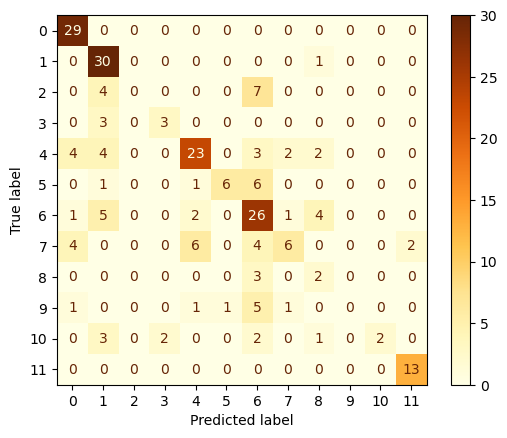

In [35]:
rf_pre_ads = RandomForestClassifier(n_estimators=300, max_depth=6,
                                    max_features=0.6, random_state=42)
rf_pre_ads.fit(X_trainval, y_trainval)
rf_pred1 = rf_pre_ads.predict(X_holdout)
cm = confusion_matrix(y_holdout, rf_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_pre_ads.classes_)
disp.plot(cmap='YlOrBr')
print(f"Figure 18. Accuracy, Recall and  Confusion Matrix for"
      f" RandomForest Classifier pre-ADASYN")
print(f"Accuracy: {accuracy_score(y_holdout, rf_pred1):.4f}")
print(f"Recall(macro):"
      f" {recall_score(y_holdout, rf_pred1, average='macro'):.4f}")


In [36]:
print("Figure 19. Classification Report (RandomForest without ADASYN"
      " resampling)\n",
      classification_report(y_holdout, rf_pred1, zero_division=0))

Figure 19. Classification Report (RandomForest without ADASYN resampling)
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       0.60      0.97      0.74        31
           2       0.00      0.00      0.00        11
           3       0.60      0.50      0.55         6
           4       0.70      0.61      0.65        38
           5       0.86      0.43      0.57        14
           6       0.46      0.67      0.55        39
           7       0.60      0.27      0.37        22
           8       0.20      0.40      0.27         5
           9       0.00      0.00      0.00         9
          10       1.00      0.20      0.33        10
          11       0.87      1.00      0.93        13

    accuracy                           0.62       227
   macro avg       0.55      0.50      0.48       227
weighted avg       0.60      0.62      0.57       227



Figure 20. Accuracy, Recall and Confusion Matrix for RandomForerst Classifier post-ADASYN
Accuracy: 0.6123
Recall(macro): 0.6378


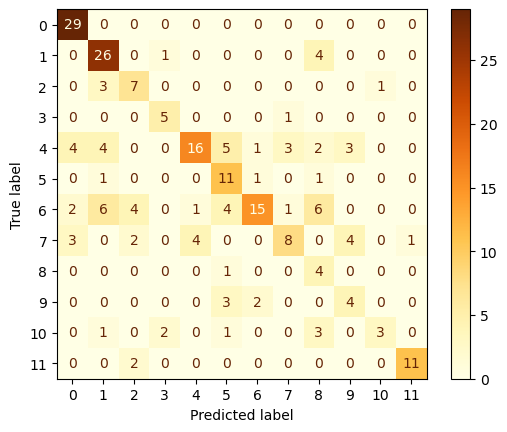

In [37]:
rf_post_ads = RandomForestClassifier(n_estimators=300, max_depth=6,
                                     max_features=0.6, random_state=42)
rf_post_ads.fit(X_train_resampled, y_resampled)
rf_pred2 = rf_post_ads.predict(X_holdout)
cm2 = confusion_matrix(y_holdout, rf_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=rf_post_ads.classes_)
disp.plot(cmap='YlOrBr')
print(f"Figure 20. Accuracy, Recall and Confusion Matrix for "
      f"RandomForerst Classifier post-ADASYN")
print(f"Accuracy: {accuracy_score(y_holdout, rf_pred2):.4f}")
print(f"Recall(macro):"
      f" {recall_score(y_holdout, rf_pred2, average='macro'):.4f}")


In [38]:
print("Figure 21. Classification Report (RandomForest with ADASYN "
      "resampling)\n",
      classification_report(y_holdout, rf_pred2, zero_division=0))

Figure 21. Classification Report (RandomForest with ADASYN resampling)
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       0.63      0.84      0.72        31
           2       0.47      0.64      0.54        11
           3       0.62      0.83      0.71         6
           4       0.76      0.42      0.54        38
           5       0.44      0.79      0.56        14
           6       0.79      0.38      0.52        39
           7       0.62      0.36      0.46        22
           8       0.20      0.80      0.32         5
           9       0.36      0.44      0.40         9
          10       0.75      0.30      0.43        10
          11       0.92      0.85      0.88        13

    accuracy                           0.61       227
   macro avg       0.61      0.64      0.58       227
weighted avg       0.68      0.61      0.61       227



Upon analyzing the difference in the confusion matrix and classification report, it became evident that the model's overall accuracy did not exhibit a significant improvement, although there was still some improvement. However, the truly fascinating insight was that despite the lack of a substantial accuracy boost, the resampling technique clearly demonstrated its effectiveness. It notably reduced misclassifications within the minority classes, highlighting its success in addressing the challenge of imbalanced data. Moreover, this improvement can be quantified by looking at the macro (or unweighted) average recall score. 

### Conclusion 
The researcher successfully developed a model with approximately 60.35% accuracy in predicting the origins of coffee beans based on taste measures, processing methods, and production altitudes.

Furthermore, the implementation of ImbLearn's ADASYN resampling technique demonstrated its capability to provide equal representation to minority classes within imbalanced datasets. It emphasized that while overall accuracy may not see a dramatic improvement, it ensures that minority classes are not neglected, underscoring the importance of valuing these less-represented categories.

For coffee enthusiasts, this model could serve as a valuable resource for expanding their knowledge on sourcing coffee beans. It highlights that even coffee beans from underrepresented countries now have an opportunity to be appreciated by coffee connoisseurs.

### Recommendation
For those interested in expanding this study, it is advisable to focus on gathering more samples for the underrepresented classes. Increasing the dataset's size will likely lead to improved model performance, as more data can be used for training. However, it's worth noting that the study demonstrated that even with the minimum number of samples required by ADASYN, the model was still able to perform, albeit not as effectively. It is recommended to try other resampling techniques as well and see how those techniques fare in comparison to ADASYN.

Furthermore, it would be a prudent approach to collaborate with domain experts in the field of coffee production and gather insights into which features significantly contribute to determining the origin of coffee beans. Expert input can provide valuable guidance for feature selection and model refinement, ultimately enhancing the model's predictive accuracy and usefulness.

Other extensions of the study can be focused on applying the same approach to other agricultural products, such as tea and rice, where origin of the product has a relationship with its quality or taste.

### References


1. Volpatto, D. (2023). Coffee Quality Database from CQI. Kaggle. Available at: [https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi).


2. scikit-learn developers. (2023). scikit-learn: Machine Learning in Python. Available at: [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html).

3. imbalanced-learn developers. (2023). imbalanced-learn: Over-sampling and under-sampling techniques. Available at: [https://imbalanced-learn.org/stable/](https://imbalanced-learn.org/stable/).


### Acknowledgement
The author extends his sincere gratitude to his mentors, Prof. Chris Monterola, Prof. K-Anne Carandang, and Prof. Leo Lorenzo II, for their unwavering support and guidance throughout the entire Machine Learning 1 course, and especially during the completion of this project.

The author also acknowledges their cohortmates and learning teammates for their valuable contributions in fostering idea generation, enabling discussions, and brainstorming.

Additionally, a special mention goes to ChatGPT-3.5 and ChatGPT-4 by OpenAI, which the author utilized as augmenting tools to assist in the successful execution of this project.